(10000, 300)
(10000, 300)
(10000,)
(10000, 10000)
(480, 504)
480
504
(10000, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in exp


(10000, 10000)
(10000, 1)
(480, 504)


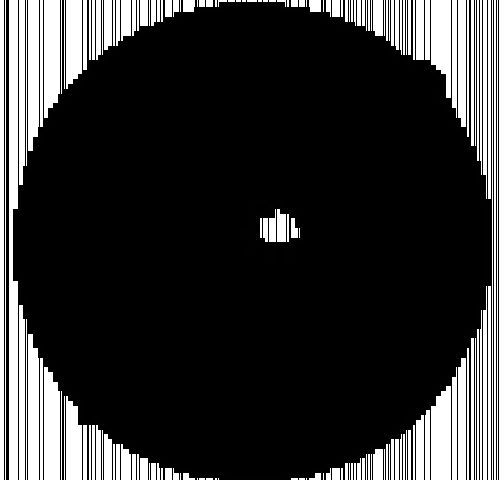

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

A = np.loadtxt("/content/drive/My Drive/rawmatrix.txt", delimiter = ',')
B = np.loadtxt("/content/drive/My Drive/adaptmatrix.txt", delimiter = ',')
#print(A.shape)
#print(B.shape)
X = A
X = X.transpose()
Y = B
Y = Y.transpose()
print(X.shape)
print(Y.shape)
neurons = 10000
theta = [[0 for i in range(neurons)] for j in range(neurons)] 
theta = np.array(theta)

print(theta[0].shape)

print(theta.shape)

iterations = 5000
alpha = 0.1
#lamb = 0.01
#lambp = alpha*lamb

Xp = X.transpose()

testimg = cv2.imread('/content/drive/My Drive/newwhmasked_data/(49).jpg',0)
print(testimg.shape)
rws, cls = testimg.shape
print(rws)
print(cls)
#testimg = np.invert(testimg)
dim = int(math.sqrt(neurons))
testimg = cv2.resize(testimg,(dim, dim), interpolation = cv2.INTER_CUBIC)
#testimg = cv2.resize(testimg,(20, 20), interpolation = cv2.INTER_LINEAR)
#testimg = cv2.resize(testimg,(20, 20), interpolation = cv2.INTER_CUBIC)
#cv2.imshow('testimg',testimg)
testimg = testimg.reshape(-1,neurons).astype(np.float32)

#tb = np.ones(len(testimg))
#tb = np.array([tb])

testimg = testimg.transpose()
print(testimg.shape)
#testimg = np.append(tb,testimg,axis=0)

def sigmoid(X,theta):
    
    return (1/(1 + np.exp(-(np.dot(theta,X)))))

def gradientdescent(X,Y,theta,alpha,iterations,Xp):
    
    n = 0
    while(n <= iterations):
        
        #temp = ((theta*(1-((lambp)/(len(Y)))))-(alpha*(1/len(Y))*(np.dot((sigmoid(X,theta)-Y),Xp))))
        temp = (theta-(alpha*(1/len(Y))*(np.dot((sigmoid(X,theta)-Y),Xp))))
#        temp = (theta - (alpha*(1/len(Y))*(np.dot((softmax(X,theta) - Y),Xp))))
        
        theta = temp

        n = n + 1
        
    #return theta[0]
    return theta

thetas = gradientdescent(X,Y,theta,alpha,iterations,Xp)
print(thetas.shape)

result = sigmoid(testimg,thetas)
print(result.shape)
result = result.transpose()
result = result.reshape(dim,dim).astype(np.float32)
#result = result.transpose()


#result = cv2.resize(testimg,(rws, cls), interpolation = cv2.INTER_CUBIC)
result = cv2.resize(result,(cls,rws),interpolation=cv2.INTER_CUBIC)
#result,th = cv2.threshold(result,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(result.shape)
for i in range(rws):
  for j in range(cls):
    if result[i][j] == 1:
      result[i][j] = 255

cv2_imshow(result)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(480, 504)
480
504
(10000, 1)
(10000, 1)
(100, 100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


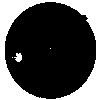

In [27]:
import math
import cv2
import numpy as np
testimg = cv2.imread('/content/drive/My Drive/newwhmasked_data/89.jpg',0)
#clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(4,4))
#testimg = clahe.apply(testimg)
thetas = np.loadtxt("/content/drive/My Drive/thetasnew100.txt", delimiter = ',')
def sigmoid(X,theta):
    
    return (1/(1 + np.exp(-(np.dot(theta,X)))))
print(testimg.shape)
rws, cls = testimg.shape
print(rws)
print(cls)
#testimg = np.invert(testimg)
#dim = 50
neurons = 10000
dim = int(math.sqrt(neurons))
testimg = cv2.resize(testimg,(dim, dim), interpolation = cv2.INTER_CUBIC)
#testimg = cv2.resize(testimg,(20, 20), interpolation = cv2.INTER_LINEAR)
#testimg = cv2.resize(testimg,(20, 20), interpolation = cv2.INTER_CUBIC)
#cv2.imshow('testimg',testimg)
testimg = testimg.reshape(-1,neurons).astype(np.float32)

#tb = np.ones(len(testimg))
#tb = np.array([tb])

testimg = testimg.transpose()
print(testimg.shape)
result = sigmoid(testimg,thetas)
print(result.shape)
result = result.transpose()
result = result.reshape(dim,dim).astype(np.float32)
#result = result.transpose()

cls = 100
rws = 100
#result = cv2.resize(testimg,(rws, cls), interpolation = cv2.INTER_CUBIC)
#result = cv2.resize(result,(cls,rws),interpolation=cv2.INTER_CUBIC)
#result,th = cv2.threshold(result,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(result.shape)
for i in range(rws):
  for j in range(cls):
    if result[i][j] == 1:
      result[i][j] = 255

cv2_imshow(result)

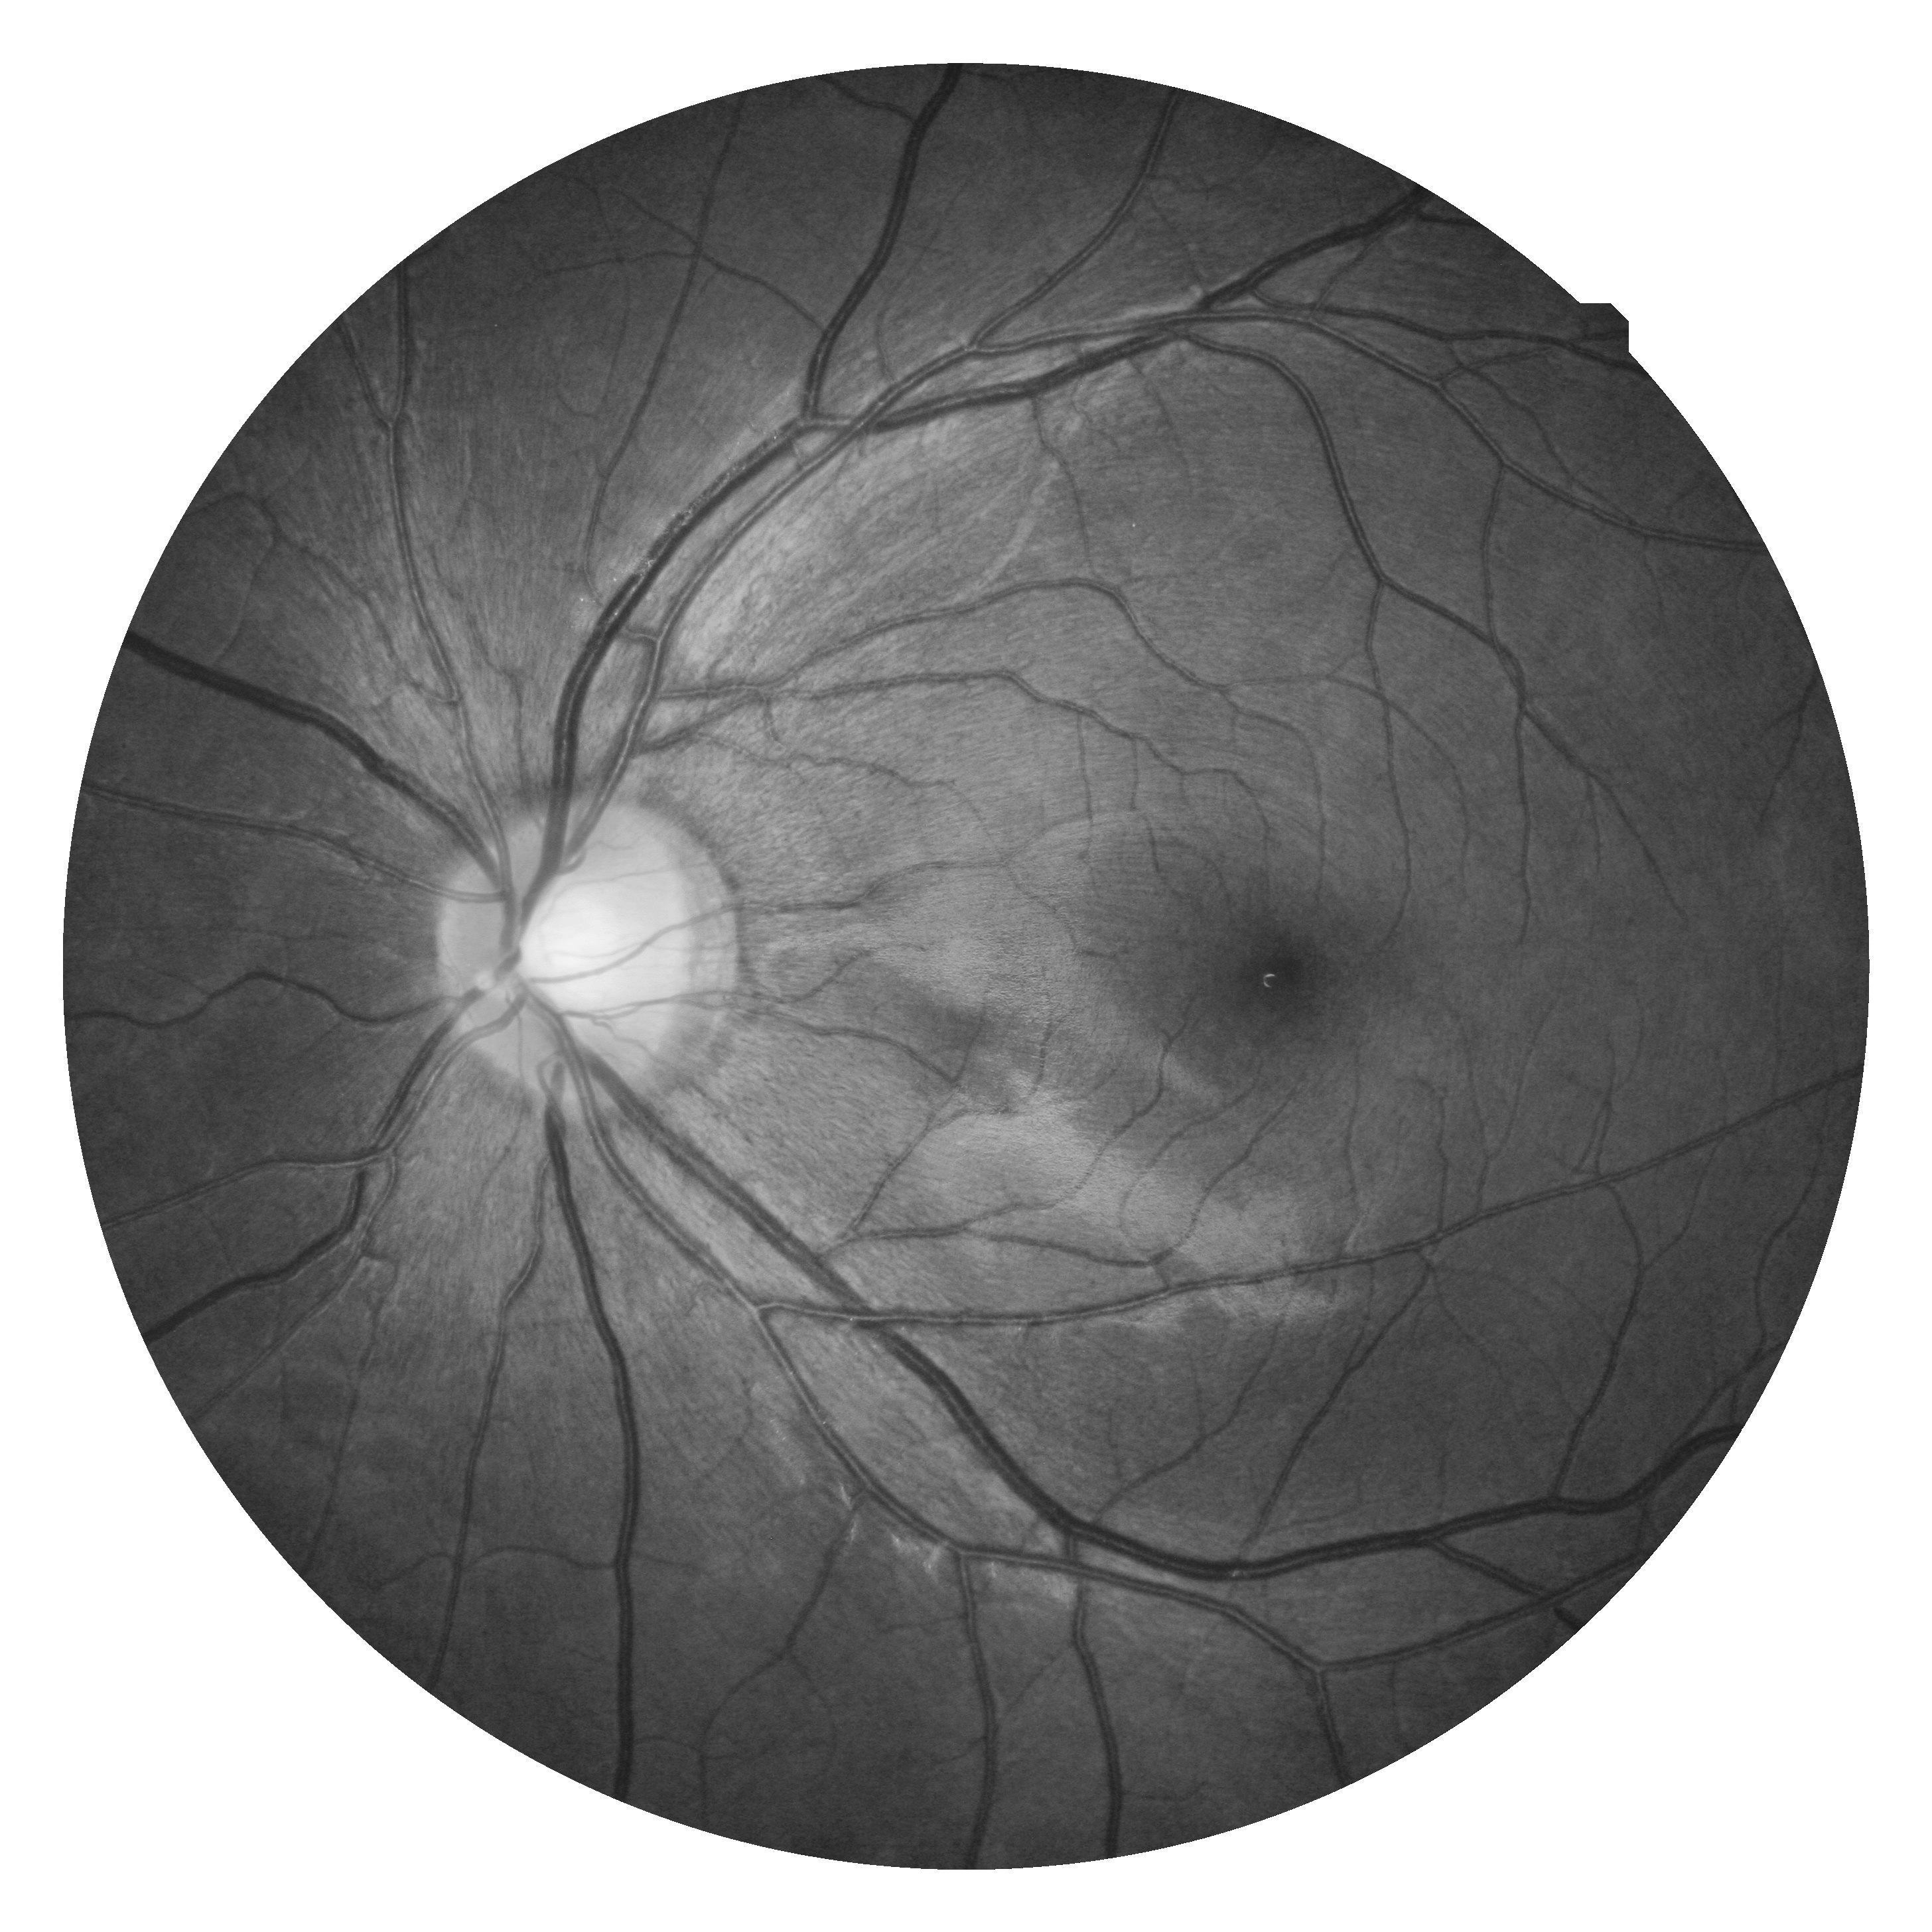

In [17]:
import cv2
img = cv2.imread('/content/drive/My Drive/newwhmasked_data/P12_1.jpg',0)
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
img = clahe.apply(img)
cv2_imshow(img)

In [2]:
import numpy as np
np.savetxt('/content/drive/My Drive/thetasnew100.txt',thetas,delimiter=',')

In [ ]:
testn = cv2.imread('/content/drive/My Drive/newwhmasked_data/(49).jpg',0)
print(testn.shape)

(480, 504)


(480, 504)


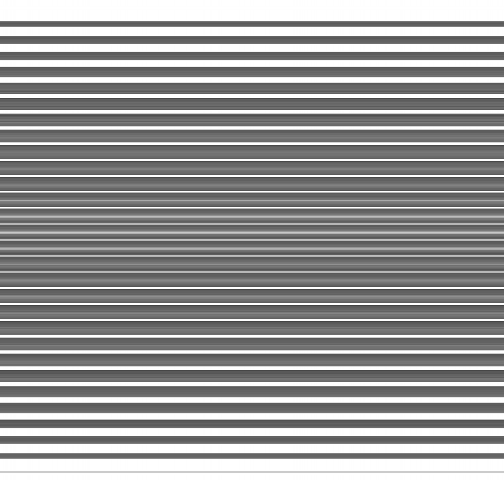

In [ ]:
from google.colab.patches import cv2_imshow
#result = cv2.resize(result,(cls, rws), interpolation = cv2.INTER_CUBIC)
print(result.shape)

cv2_imshow(result)

#cv2_waitKey(0)
#cv2_destroyAllWindows()
